Rows: 1595 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ins_id
dbl (2): Date, close

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2372 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (9): Open, High, Low, Close, Volume, Dividends, Stock Splits, vol10, vol30
date (1): Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


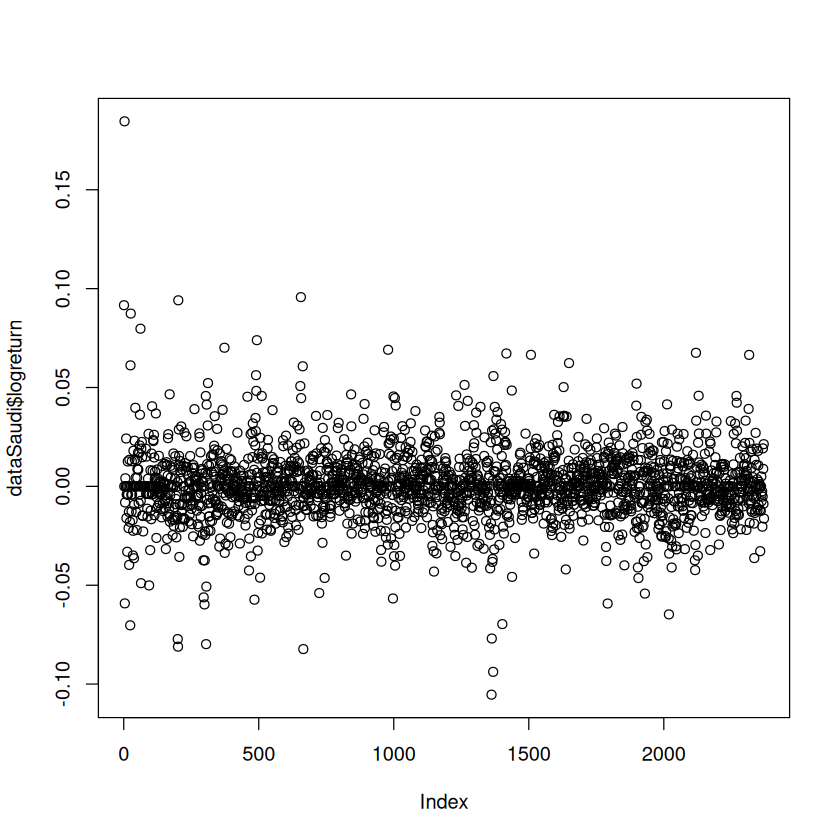

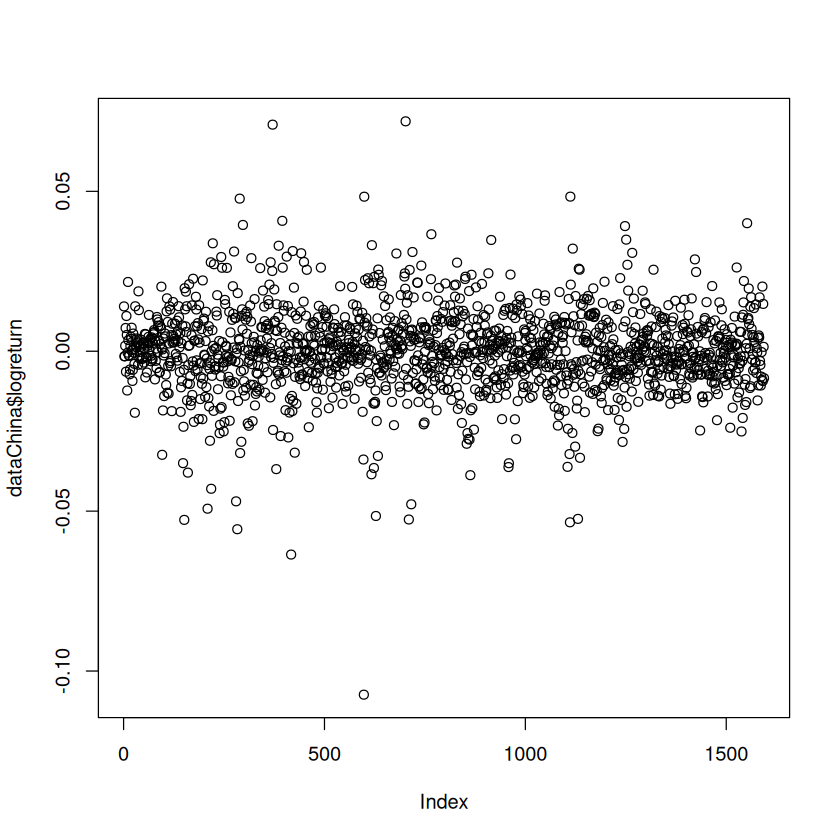

In [30]:
source("helper.R")
data_ori <- as.data.frame(read_csv("data/IFclose.csv"))
logpt<-log(data_ori$close)
logreturn <-logpt[2:length(logpt)]-logpt[1:(length(logpt)-1)]
date <- as.Date(as.character(data_ori$Date[1:(length(data_ori$Date)-1)]), format = "%Y%m%d")
date_timeindex<-as.numeric(as.POSIXct(date)) 
date_timeindex <- (date_timeindex - min(date_timeindex))/86400 ## 1 day = 86400 seconds
mesh <- fm_mesh_1d(date_timeindex)
dataChina = list(logreturn = logreturn, times = date_timeindex)
data_ori <- as.data.frame(read_csv("data/1180_vol.csv"))
logpt<-log(data_ori$Close)
logreturn <-logpt[2:length(logpt)]-logpt[1:(length(logpt)-1)] ## 1 day = 86400 seconds
date <- data_ori$Date[1:(length(data_ori$Date)-1)]
date_timeindex<-as.numeric(as.POSIXct(date)) 
date_timeindex <- (date_timeindex - min(date_timeindex))/86400
mesh <- fm_mesh_1d(date_timeindex)
dataSaudi = list(logreturn = logreturn, times = date_timeindex)
if(FALSE){
    data=dataChina
}else{
    data=dataSaudi
}

par(bg = "white") 
plot(dataSaudi$logreturn)
plot(dataChina$logreturn)


# 5 models

In [33]:

OU_model <- rspde.matern(mesh = mesh,parameterization="matern")
formula_OU <- logreturn ~  field(times, model = OU_model)
fit<-bru(formula_OU, family="stochvol", data = data)
result_fit<- rspde.result(fit, "field", OU_model, parameterization="matern")
print(fit$mlik[2])
summary(result_fit)

Warning message in bru_log_warn(paste0("Non data-frame list-like data supplied; ", :
“Non data-frame list-like data supplied; guessing allow_combine=TRUE.
  Specify allow_combine explicitly to avoid this warning.”


[1] 6605.74


,mean,sd,0.025quant,0.5quant,0.975quant,mode
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
std.dev,1.274080,0.18983000,0.997769,1.240030,1.730030,1.151950
range,184.103000,10.10760000,166.022000,183.426000,205.638000,181.538000
nu,0.471144,0.00762094,0.457773,0.470517,0.487498,0.468467


In [37]:

rspde.order=2
prior.range.nominal=0.5
prior.std.dev.nominal=10
OU_model <- rspde.matern(mesh = mesh,parameterization="matern",rspde.order=rspde.order,prior.range.nominal=prior.range.nominal,prior.std.dev.nominal=prior.std.dev.nominal)
formula_OU <- logreturn ~  field(times, model = OU_model)
fit<-bru(formula_OU, family="stochvol.t", data = data)
result_fit<- rspde.result(fit, "field", OU_model, parameterization="matern")
print(fit$mlik[2])
summary(result_fit)

Warning message in bru_log_warn(paste0("Non data-frame list-like data supplied; ", :
“Non data-frame list-like data supplied; guessing allow_combine=TRUE.
  Specify allow_combine explicitly to avoid this warning.”


[1] 6628.441


,mean,sd,0.025quant,0.5quant,0.975quant,mode
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
std.dev,1.341490,0.2837190,1.0062100,1.270600,2.070040,1.0838100
range,21.325400,5.4281600,11.6023000,21.125000,32.541300,20.7152000
nu,0.119188,0.0674447,0.0175745,0.110986,0.255777,0.0601601


In [20]:

OU_model <- rspde.matern(mesh = mesh,parameterization="matern")
formula_OU <- logreturn ~  field(times, model = OU_model)
fit<-bru(formula_OU, family="stochvol.t", data = data)
result_fit<- rspde.result(fit, "field", OU_model, parameterization="matern")
print(fit$mlik[2])
summary(result_fit)

Warning message in bru_log_warn(paste0("Non data-frame list-like data supplied; ", :
“Non data-frame list-like data supplied; guessing allow_combine=TRUE.
  Specify allow_combine explicitly to avoid this warning.”


[1] 6628.385


,mean,sd,0.025quant,0.5quant,0.975quant,mode
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
std.dev,1.093690,0.249891,0.7468490,1.043430,1.710890,0.932730
range,22.030100,8.859480,8.2616600,20.962800,42.305500,18.220400
nu,0.294889,0.181431,0.0420301,0.264762,0.712629,0.140469


In [22]:

OU_model <- rspde.matern(mesh = mesh,parameterization="matern")
formula_OU <- logreturn ~  field(times, model = OU_model)
fit<-bru(formula_OU, family="stochvol.nig", data = data)
result_fit<- rspde.result(fit, "field", OU_model, parameterization="matern")
print(fit$mlik[2])
summary(result_fit)

Warning message in bru_log_warn(paste0("Non data-frame list-like data supplied; ", :
“Non data-frame list-like data supplied; guessing allow_combine=TRUE.
  Specify allow_combine explicitly to avoid this warning.”


[1] 6606.989


,mean,sd,0.025quant,0.5quant,0.975quant,mode
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
std.dev,1.217290,0.05308810,1.10814,1.21988,1.315280,1.229980
range,215.529000,28.98410000,153.72300,218.53500,261.890000,231.890000
nu,0.486836,0.00559321,0.47470,0.48737,0.496389,0.489218


In [23]:

OU_model <- rspde.matern(mesh = mesh,parameterization="matern")
formula_OU <- logreturn ~  field(times, model = OU_model)
fit<-bru(formula_OU, family="stochvolln", data = data)
result_fit<- rspde.result(fit, "field", OU_model, parameterization="matern")
print(fit$mlik[2])
summary(result_fit)

Warning message in bru_log_warn(paste0("Non data-frame list-like data supplied; ", :
“Non data-frame list-like data supplied; guessing allow_combine=TRUE.
  Specify allow_combine explicitly to avoid this warning.”


[1] 6537.542


,mean,sd,0.025quant,0.5quant,0.975quant,mode
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
std.dev,3.159660,0.1363050,2.864670,3.173470,3.389070,3.231230
range,277.254000,8.2052800,264.206000,276.160000,295.825000,272.390000
nu,0.576841,0.0250673,0.536907,0.573526,0.633461,0.561944


In [25]:
rspde_model1 <- rspde.matern(mesh = mesh,nu.upper.bound=1)

rspde_model2 <- rspde.matern(mesh = mesh,nu.upper.bound=2)
formula <- logreturn ~ Intercept(1) + rough(times, model = rspde_model1) + smooth(times, model = rspde_model2)+f(times,model="iid")

fit <- bru(formula, family="stochvol", data = data)
result_fit1<- rspde.result(fit, "rough", rspde_model1, parameterization="matern")
result_fit2<- rspde.result(fit, "smooth", rspde_model2, parameterization="matern")
print(fit$mlik[2])
rbind(summary(result_fit1),summary(result_fit2))

Warning message in bru_log_warn(paste0("Non data-frame list-like data supplied; ", :
“Non data-frame list-like data supplied; guessing allow_combine=TRUE.
  Specify allow_combine explicitly to avoid this warning.”


[1] 63077.46


,mean,sd,0.025quant,0.5quant,0.975quant,mode
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
std.dev,6.83274e+01,5.97518e-01,6.71364e+01,6.83328e+01,6.94882e+01,6.82646e+01
range,3.67026e+03,1.50978e+01,3.64250e+03,3.66961e+03,3.70143e+03,3.66971e+03
nu,4.80002e-01,7.11911e-04,4.78486e-01,4.80056e-01,4.81263e-01,4.80237e-01
std.dev1,5.47690e-03,5.15133e-05,5.36340e-03,5.48133e-03,5.56556e-03,5.50045e-03
range1,4.32322e+03,2.14438e+01,4.28092e+03,4.32337e+03,4.36466e+03,4.32013e+03
nu1,1.53663e-01,6.36298e-04,1.52320e-01,1.53707e-01,1.54804e-01,1.53852e-01
